In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import csv

In [3]:
real_estate_df=pd.read_csv('RealEstate.csv')

In [4]:
real_estate_df.head()

,Unnamed: 0,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,price,status,possession,Approved by RERA
0,0,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",1050,"2,999 / sq ft",31.48 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes
1,1,3 BHK Apartment in Ramky One KrystalSheela Nag...,Ramky Estates Farms Ltd,"Sheela Nagar, Visakhapatnam",1495,"4,749 / sq ft",70.99 L,Under Construction,Possession by Nov 2023New,Yes
2,2,2 BHK Apartment in Srivira Chakri MeadowsPendu...,Srivira Infra Private Limited,"Pendurthi, Visakhapatnam",1375,"3,400 / sq ft",46.75 L,Under Construction,Possession by May 2023New,Yes
3,3,"3 BHK Apartment in Apex CelestGajuwaka, Visakh...",Apex Meadows Private Limited,"Gajuwaka, Visakhapatnam",1271,"6,573 / sq ft",83.55 L,Under Construction,Possession by Mar 2024New,Yes
4,4,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",895,"2,999 / sq ft",26.84 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes


# Data Cleaning

In [5]:
real_estate_df.drop('Unnamed: 0',axis=1, inplace=True)

In [6]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   proprty_type      2980 non-null   object
 1   seller            2980 non-null   object
 2   Location          2980 non-null   object
 3   Area in sqft      2980 non-null   int64 
 4   Rate/sq_ft        2980 non-null   object
 5   price             2980 non-null   object
 6   status            2980 non-null   object
 7   possession        2971 non-null   object
 8   Approved by RERA  2980 non-null   object
dtypes: int64(1), object(8)
memory usage: 209.7+ KB


In [7]:
real_estate_df.isna().sum()

proprty_type        0
seller              0
Location            0
Area in sqft        0
Rate/sq_ft          0
price               0
status              0
possession          9
Approved by RERA    0
dtype: int64

### in the possession we have 21 null values

In [8]:
real_estate_df[real_estate_df['possession'].isna()].head()

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,price,status,possession,Approved by RERA
27,"Residential PlotAnandapuram, Visakhapatnam",seller,"Anandapuram, Visakhapatnam",1800,"2,666 / sq ft",48 L,Resale,NaN,No
31,Residential Plot in Bhoomatha Srinivasa Reside...,seller,"Bheemunipatnam, Visakhapatnam",1800,"1,388 / sq ft",25 L,Resale,NaN,Yes
32,"Residential PlotBheemunipatnam, Visakhapatnam",seller,"Bheemunipatnam, Visakhapatnam",8388,"1,500 / sq ft",1.25 Cr,Resale,NaN,No
45,"Residential PlotAnandapuram, Visakhapatnam",4closure,"Anandapuram, Visakhapatnam",2178,"2,800 / sq ft",61 L,Resale,NaN,No
59,"Residential PlotTagarapuvalasa, Visakhapatnam",Harish,"Tagarapuvalasa, Visakhapatnam",1539,"2,555 / sq ft",39.33 L,New,NaN,No


In [9]:
real_estate_df['possession'] = real_estate_df['possession'].fillna(value='1-2 years old')

In [10]:
real_estate_df.isna().sum()

proprty_type        0
seller              0
Location            0
Area in sqft        0
Rate/sq_ft          0
price               0
status              0
possession          0
Approved by RERA    0
dtype: int64

In [11]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   proprty_type      2980 non-null   object
 1   seller            2980 non-null   object
 2   Location          2980 non-null   object
 3   Area in sqft      2980 non-null   int64 
 4   Rate/sq_ft        2980 non-null   object
 5   price             2980 non-null   object
 6   status            2980 non-null   object
 7   possession        2980 non-null   object
 8   Approved by RERA  2980 non-null   object
dtypes: int64(1), object(8)
memory usage: 209.7+ KB


In [12]:
real_estate_df["BHK"]=real_estate_df["proprty_type"].apply(lambda x: re.findall("^\d",str(x)))

In [13]:
real_estate_df.head()

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,price,status,possession,Approved by RERA,BHK
0,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",1050,"2,999 / sq ft",31.48 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes,[2]
1,3 BHK Apartment in Ramky One KrystalSheela Nag...,Ramky Estates Farms Ltd,"Sheela Nagar, Visakhapatnam",1495,"4,749 / sq ft",70.99 L,Under Construction,Possession by Nov 2023New,Yes,[3]
2,2 BHK Apartment in Srivira Chakri MeadowsPendu...,Srivira Infra Private Limited,"Pendurthi, Visakhapatnam",1375,"3,400 / sq ft",46.75 L,Under Construction,Possession by May 2023New,Yes,[2]
3,"3 BHK Apartment in Apex CelestGajuwaka, Visakh...",Apex Meadows Private Limited,"Gajuwaka, Visakhapatnam",1271,"6,573 / sq ft",83.55 L,Under Construction,Possession by Mar 2024New,Yes,[3]
4,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",895,"2,999 / sq ft",26.84 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes,[2]


In [14]:
x=[]
for i in real_estate_df["BHK"]:
    if len(i)==0:
        x.append('Residential Plot')
        
    else:
        x.append(i[0])
real_estate_df['BHK']=x           

In [15]:
# o=[]
# for x in r["BHK"]:
#     if x=='0':
#         o.append("open plot")
#     else:
#         o.append(x)
# r["BHK"]=o

In [16]:
real_estate_df["BHK"].value_counts()

Residential Plot    1466
2                    903
3                    591
4                     12
1                      2
5                      2
6                      1
7                      1
9                      1
8                      1
Name: BHK, dtype: int64

In [17]:
real_estate_df['BHK'].unique()

array(['2', '3', '6', 'Residential Plot', '4', '7', '1', '5', '9', '8'],
      dtype=object)

### removing 'sqft' in Rate/sq_ft

In [18]:
x=[]
for i in real_estate_df['Rate/sq_ft']:
        x.append(i.replace(",",''))
s=[]
for i in x:
    s.append(re.findall("\d+",str(i))[0])
real_estate_df['Rate/sq_ft']=s

In [19]:
real_estate_df.head()

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,price,status,possession,Approved by RERA,BHK
0,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",1050,2999,31.48 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes,2
1,3 BHK Apartment in Ramky One KrystalSheela Nag...,Ramky Estates Farms Ltd,"Sheela Nagar, Visakhapatnam",1495,4749,70.99 L,Under Construction,Possession by Nov 2023New,Yes,3
2,2 BHK Apartment in Srivira Chakri MeadowsPendu...,Srivira Infra Private Limited,"Pendurthi, Visakhapatnam",1375,3400,46.75 L,Under Construction,Possession by May 2023New,Yes,2
3,"3 BHK Apartment in Apex CelestGajuwaka, Visakh...",Apex Meadows Private Limited,"Gajuwaka, Visakhapatnam",1271,6573,83.55 L,Under Construction,Possession by Mar 2024New,Yes,3
4,2 BHK Apartment in MVV And MK MVV & MK ParkKur...,MVV MK Housing,"Kurmannapalem, Visakhapatnam",895,2999,26.84 L,Under Construction,Possession by Jul 20232 BathroomsNew,Yes,2


### extracting project name from proprty type

In [20]:
x=[]
for i in real_estate_df['proprty_type']:
    #print(i)
    a=i.split(",")[-2]
    x.append(a)

    #re.findall("\w+",str(a))
a=[]
for i in x:
    y=i.split(" in ")
    a.append(y[-1])
len(a)

2980

In [21]:
e=[]
for i in a:
    t=i.split()
    e.append(" ".join(t[:2]))
real_estate_df['project name']=e

### convert the price to price in lacks

In [22]:
p=[]
for i in real_estate_df['price']:
    if i.split()[-1]=='Cr':
        p.append(round(float(i.split()[0])*100,2))
        
    else:
        p.append(float(i.split()[0]))
real_estate_df['Price(in lakhs)']=p

### extracting the  extact location

In [23]:
l=[]
for i in real_estate_df["Location"]:
    l.append(i.split(",")[0])
real_estate_df["Location"]=l

### extracting the extact proprty type of houses

In [24]:
regex = "Apartment|Residential|Independent|Villa"
real_estate_df["proprty_type"]=real_estate_df["proprty_type"].apply(lambda x: re.findall(regex,str(x)))

In [25]:
x=[]
for i in real_estate_df['proprty_type']:
    if len(i)==0:
        x.append('0')
    else:
        x.append(i[0])
real_estate_df['proprty_type']=x


### converting the data type of Rate/sq_ft to float

In [26]:
real_estate_df['Rate/sq_ft']=real_estate_df['Rate/sq_ft'].astype('float')

### extracting the possssion date

In [27]:
s=[]
for i in real_estate_df['possession']:
    
    if ["Possession" ,"by"] in i.split():
        s.append(i[2:4])
       
    else:
        s.append(i)

In [28]:
p=[]
for i in real_estate_df['possession']:
    if 'Possession' in i.split():
        x=i.split()[2:4]
        p.append(" ".join(x))
        
    else:
        p.append("not mentioned")
real_estate_df['possession']=p

In [29]:
real_estate_df.Location = real_estate_df.Location.apply(lambda x: x.replace("PMPalem","Pothinamallayya Palem") if x =="PMPalem" else x  )

In [30]:
del real_estate_df['price']

## Final data frame

In [31]:
real_estate_df.head()

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,status,possession,Approved by RERA,BHK,project name,Price(in lakhs)
0,Apartment,MVV MK Housing,Kurmannapalem,1050,2999.0,Under Construction,Jul 20232,Yes,2,MVV And,31.48
1,Apartment,Ramky Estates Farms Ltd,Sheela Nagar,1495,4749.0,Under Construction,Nov 2023New,Yes,3,Ramky One,70.99
2,Apartment,Srivira Infra Private Limited,Pendurthi,1375,3400.0,Under Construction,May 2023New,Yes,2,Srivira Chakri,46.75
3,Apartment,Apex Meadows Private Limited,Gajuwaka,1271,6573.0,Under Construction,Mar 2024New,Yes,3,Apex CelestGajuwaka,83.55
4,Apartment,MVV MK Housing,Kurmannapalem,895,2999.0,Under Construction,Jul 20232,Yes,2,MVV And,26.84


In [32]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2980 entries, 0 to 2979
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   proprty_type      2980 non-null   object 
 1   seller            2980 non-null   object 
 2   Location          2980 non-null   object 
 3   Area in sqft      2980 non-null   int64  
 4   Rate/sq_ft        2980 non-null   float64
 5   status            2980 non-null   object 
 6   possession        2980 non-null   object 
 7   Approved by RERA  2980 non-null   object 
 8   BHK               2980 non-null   object 
 9   project name      2980 non-null   object 
 10  Price(in lakhs)   2980 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 256.2+ KB


In [33]:
real_estate_df.describe()

,Area in sqft,Rate/sq_ft,Price(in lakhs)
count,2980.000000,2980.000000,2980.000000
mean,1801.234899,2903.880872,43.479930
std,8017.360228,2263.852947,56.798873
min,133.000000,138.000000,3.500000
25%,1125.000000,1301.500000,22.130000
50%,1503.000000,2354.000000,35.000000
75%,1800.000000,4157.000000,51.555000
max,435600.000000,58000.000000,2178.000000


In [34]:
real_estate_df.describe(include='object')

,proprty_type,seller,Location,status,possession,Approved by RERA,BHK,project name
count,2980,2980,2980,2980,2980,2980,2980,2980
unique,4,338,154,4,111,2,10,1020
top,Residential,property advisor,Madhurawada,New,not mentioned,No,Residential Plot,Peram Aditya
freq,1466,687,200,1311,1804,2743,1466,165


# Data Visualisation

#### Univariate Analysis:
- Numerical Variables:
    - Boxplot
    - Distplot
    - Kdeplot
    - Violinplot
    - Histogram
- Categorical Variable:
    - Countplot
    - pieplot


#### Bivariate Analysis:
- Numerical and Numerical Varible:
    - Scatterplot
    - heatmap
    - pairplot
    - regplot
    - relplot
    
- Numerical and Categorical variable:
    - Boxplot
    - Barplot
    - Violinplot
    - Scatterplot
    - Lineplot
    - Swarmplot
    
- Categorical and Categorical variables:
    - Crosstab then draw the barplot


In [35]:
import warnings
warnings.filterwarnings('ignore')

## univariate Analysis

### 1.count plot

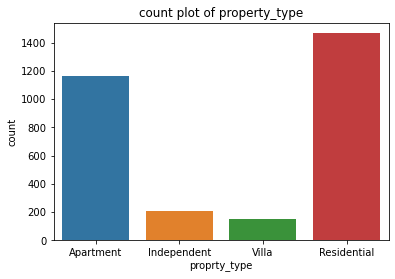

In [36]:
sns.countplot(real_estate_df['proprty_type'])
plt.title('count plot of property_type');

##### Observation:
Highest number of properties are divided in between Apartment and Residential type.

In [37]:
real_estate_df['seller'].value_counts().to_frame()

,seller
property advisor,687
Aditi Estaste,117
Shiva,92
Swati realtor,90
Soniya Estate,84
...,...
suriapparao,1
vishu,1
TAS financial services,1
venkatesh gujjala,1


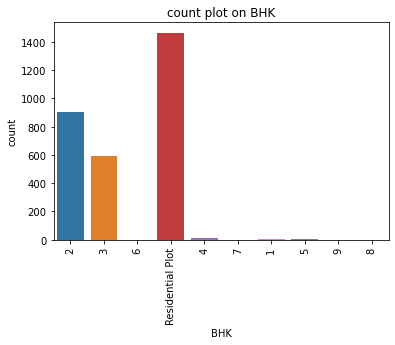

In [38]:
sns.countplot(real_estate_df['BHK'])
plt.title('count plot on BHK')
plt.xticks(rotation=90)
plt.show()

OBSERVATIONS:
There are more number of residential plots are available after that there are more number of 2 BHK  houses are available 


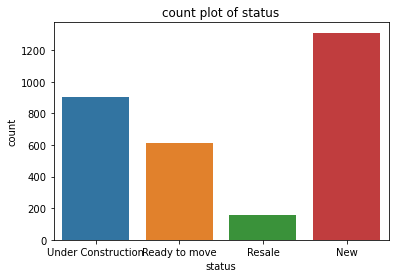

In [39]:
sns.countplot(real_estate_df['status'])
plt.title('count plot of status')
plt.show()

OBSERVATIONS:
More number of constructions are being made as Newly available plots and Under construction projects are more. 

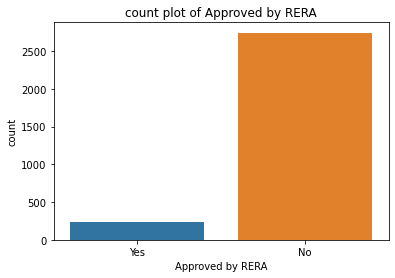

In [40]:
sns.countplot(real_estate_df['Approved by RERA'])
plt.title('count plot of Approved by RERA')
plt.show()

Observations:RERA(Real Estate Regulatory Authority-Andhra Pradesh)
More number of plots yet to be approved by RERA.

### 2.distribution plot

In [41]:
pd.cut(real_estate_df['Price(in lakhs)'],bins = 2).value_counts()

(1.326, 1090.75]     2978
(1090.75, 2178.0]       2
Name: Price(in lakhs), dtype: int64

In [42]:
real_estate_df['Price(in lakhs)'].describe()

count    2980.000000
mean       43.479930
std        56.798873
min         3.500000
25%        22.130000
50%        35.000000
75%        51.555000
max      2178.000000
Name: Price(in lakhs), dtype: float64

<AxesSubplot:xlabel='Price(in lakhs)', ylabel='Density'>

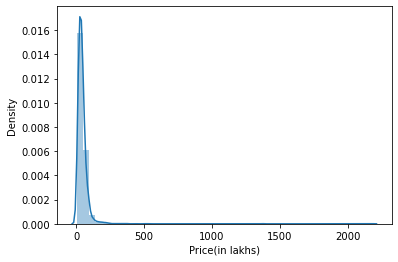

In [43]:
sns.distplot(real_estate_df['Price(in lakhs)'])

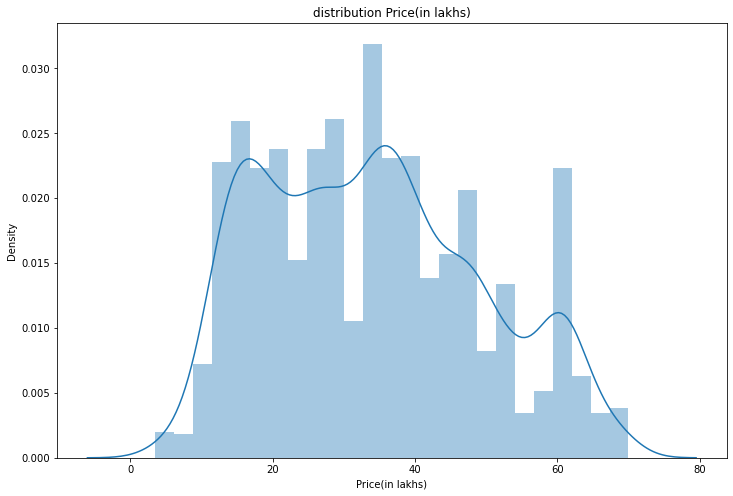

In [44]:
plt.figure(figsize=(12,8))
sns.distplot(real_estate_df[real_estate_df['Price(in lakhs)']<70]['Price(in lakhs)'],bins=25)
plt.title('distribution Price(in lakhs)')
plt.show()

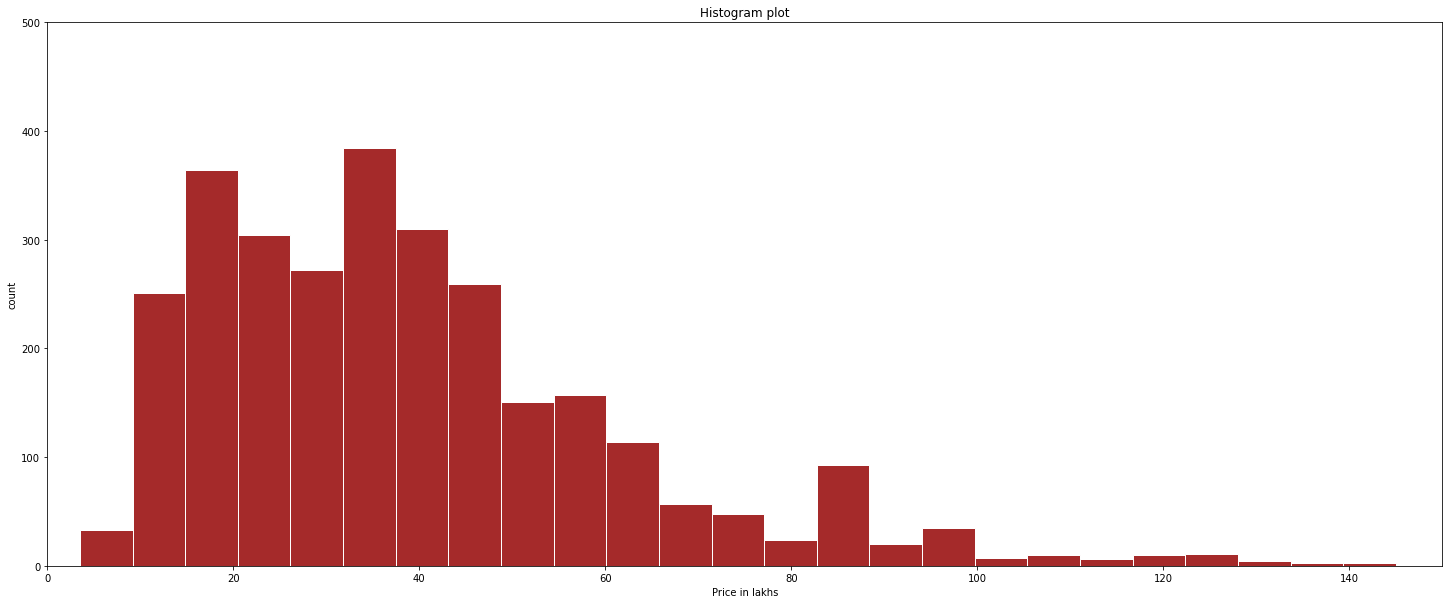

In [45]:
r_priceinlakhs=real_estate_df[real_estate_df['Price(in lakhs)']<150]
plt.figure(figsize=(25,10))
plt.hist(r_priceinlakhs['Price(in lakhs)'],bins=25,color='brown',edgecolor='white')
plt.xlabel("Price in lakhs");plt.ylabel("count")
plt.xlim((0,150))
plt.ylim((0,500))
plt.title('Histogram plot')
plt.show()

Observation:
most of the prices lies in between 15 to 40 lakhs

### 3.Box plot

In [46]:
real_estate_df['Rate/sq_ft'].describe()

count     2980.000000
mean      2903.880872
std       2263.852947
min        138.000000
25%       1301.500000
50%       2354.000000
75%       4157.000000
max      58000.000000
Name: Rate/sq_ft, dtype: float64

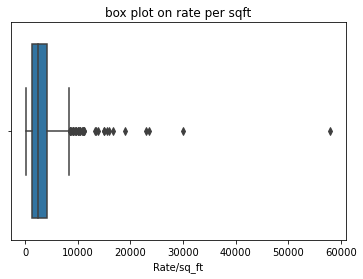

In [47]:
sns.boxplot(real_estate_df['Rate/sq_ft'])
plt.title('box plot on rate per sqft')
plt.show()

observation:
most of the rates per sq ft are lies between 1000 to 4000

### 4.histogram

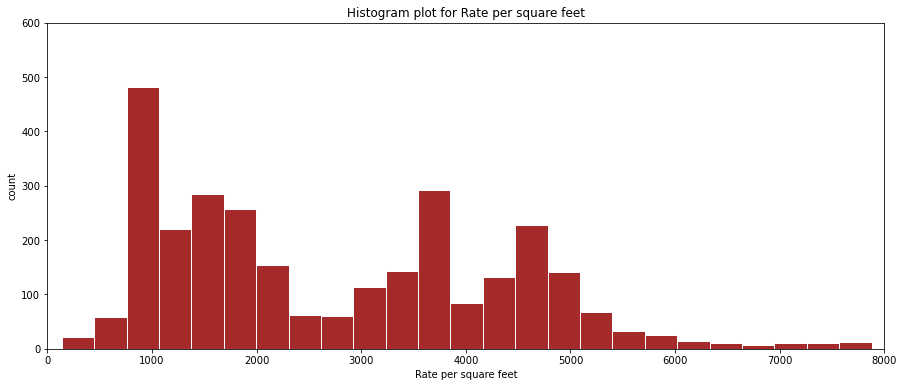

In [48]:
r_ratepersqft=real_estate_df[real_estate_df['Rate/sq_ft']<8000]
plt.figure(figsize=(15,6))
plt.hist(r_ratepersqft['Rate/sq_ft'],bins=25,color='brown',edgecolor='white')
plt.xlabel("Rate per square feet");plt.ylabel("count")
plt.xlim((0,8000))
plt.ylim((0,600))
plt.title('Histogram plot for Rate per square feet')
plt.show()

### Observation: 
- 1.count  of rate per sq ft. above 8000 are very less so we consider them as negligible
- 2. most of the values of Rate per sq ft. comes in the range b/w 1000 and 2000. and Rtae per sq ft is around 1000 Rs.
- 3.lowest of the values of rate per sq ft. comes in the range b/w 5000 and 8000.

### 5.Pie chart

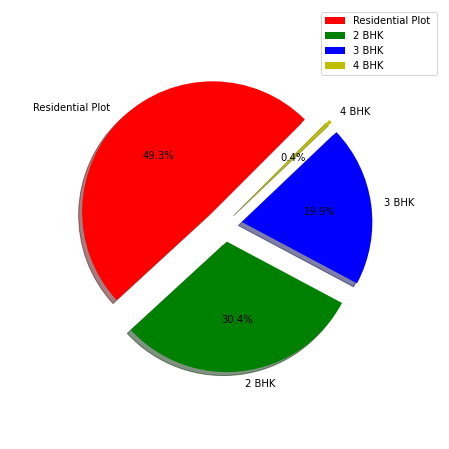

In [49]:
plt.figure(figsize=(12,8))
colors = ['r','g','b','y']
label=['Residential Plot ','2 BHK','3 BHK','4 BHK']
plt.pie(real_estate_df['BHK'].value_counts().iloc[:4],labels=label,startangle=45,colors=colors,autopct='%1.1f%%',radius=0.75,explode=[0.1,0.1,0.1,0.1],shadow=True)
plt.legend()
plt.show()

observation:
there are more number of residential plots available in, as compared to 2 bhk 3 bhk
and only few 4 bhks available in.

## BIVARIATE ANALYSIS

In [50]:
pd.pivot_table(data=real_estate_df,index=['proprty_type','BHK'],values=['Price(in lakhs)'])

Price(in lakhs)
proprty_type BHK                              
Apartment    1                       59.980000
             2                       39.125487
             3                       77.634762
             4                      161.038889
Independent  2                       52.807065
             3                      100.000000
             4                      240.000000
             6                      150.000000
             7                      195.000000
             8                      220.000000
             9                       81.000000
Residential  Residential Plot        29.999761
Villa        2                       40.783000
             3                       64.288889
             4                      170.000000
             5                      222.500000

## 1.Bar plot

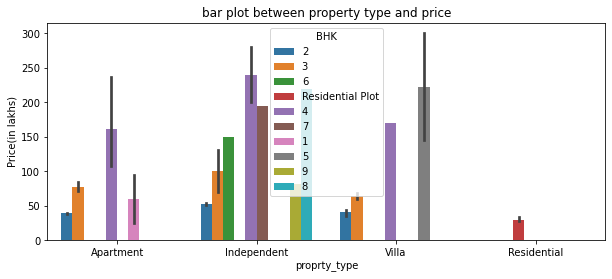

In [51]:
plt.figure(figsize=(10,4))
sns.barplot(x='proprty_type',y='Price(in lakhs)',hue="BHK",data=real_estate_df)
plt.title('bar plot between property type and price')
plt.show()

### observation
-  Avg prices of Appartments are in range of 40L to 165L
-  Avg prices of independent house available in range of 51L to 380L
-  residential plots available for an avg of 30L
-  avg prices of villas avilable in range of 50L to 160L

### 2.Line chart

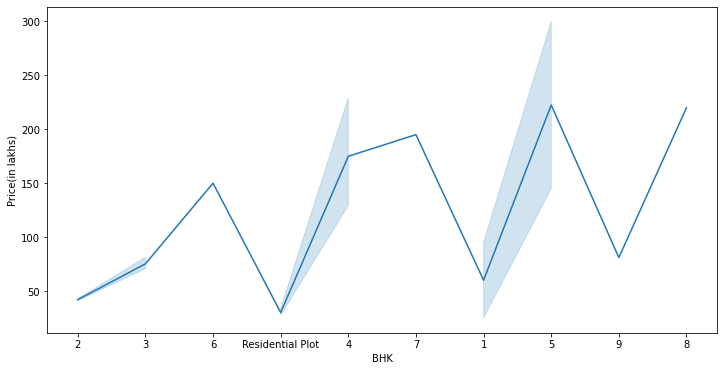

In [52]:
plt.figure(figsize=(12,6))
sns.lineplot(x='BHK',y='Price(in lakhs)',data=real_estate_df)
plt.show()

### 3.scatter plot

<AxesSubplot:xlabel='Price(in lakhs)', ylabel='Area in sqft'>

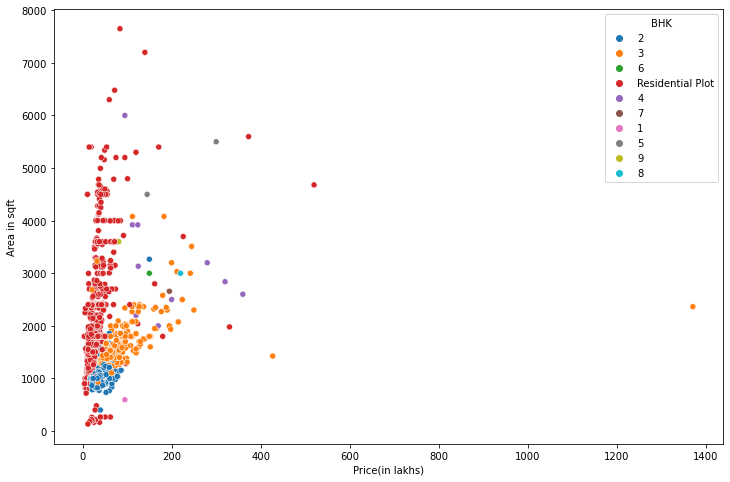

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Price(in lakhs)',y='Area in sqft',data=real_estate_df[real_estate_df['Area in sqft']<8000],hue="BHK")

observation: by the above scatter plot we can say area and price are highly positivly correlated

### 4.pair plot

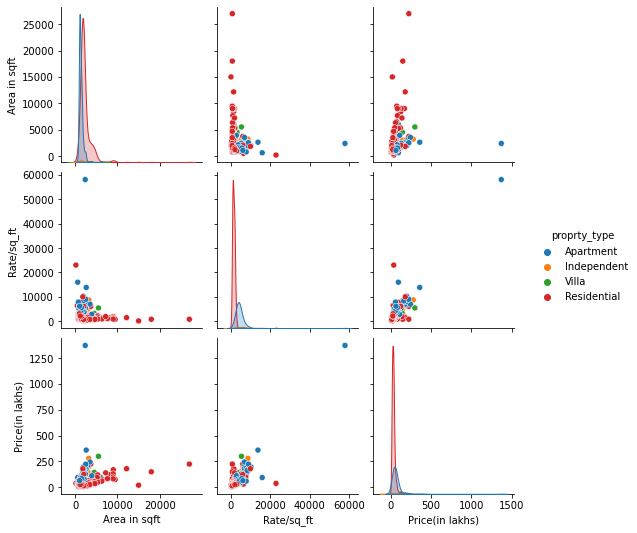

<Figure size 1080x576 with 0 Axes>

In [54]:
sns.pairplot(data=real_estate_df.head(1000),hue='proprty_type')
plt.figure(figsize=(15,8))
plt.show()

In [55]:
real_estate_df.head()

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,status,possession,Approved by RERA,BHK,project name,Price(in lakhs)
0,Apartment,MVV MK Housing,Kurmannapalem,1050,2999.0,Under Construction,Jul 20232,Yes,2,MVV And,31.48
1,Apartment,Ramky Estates Farms Ltd,Sheela Nagar,1495,4749.0,Under Construction,Nov 2023New,Yes,3,Ramky One,70.99
2,Apartment,Srivira Infra Private Limited,Pendurthi,1375,3400.0,Under Construction,May 2023New,Yes,2,Srivira Chakri,46.75
3,Apartment,Apex Meadows Private Limited,Gajuwaka,1271,6573.0,Under Construction,Mar 2024New,Yes,3,Apex CelestGajuwaka,83.55
4,Apartment,MVV MK Housing,Kurmannapalem,895,2999.0,Under Construction,Jul 20232,Yes,2,MVV And,26.84


## comparing prices in some perticular locations# 

In [56]:
loc=real_estate_df['Location'].value_counts().sort_values(ascending=False)[0:10]

In [57]:
loc.index

Index(['Madhurawada', 'Tagarapuvalasa', 'Lankelapalem',
       'Pothinamallayya Palem', 'Gajuwaka', 'Bhogapuram', 'Duvvada',
       'Kurmannapalem', 'Achutapuram', 'Anandapuram'],
      dtype='object')

In [58]:
r_loc=real_estate_df[(real_estate_df['Location'].isin(loc.index))]

In [59]:
r_loc['Location'].value_counts().to_frame()

,Location
Madhurawada,200
Tagarapuvalasa,197
Lankelapalem,190
Pothinamallayya Palem,178
Gajuwaka,166
Bhogapuram,157
Duvvada,151
Kurmannapalem,146
Achutapuram,143
Anandapuram,111


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Madhurawada'),
  Text(1, 0, 'Tagarapuvalasa'),
  Text(2, 0, 'Lankelapalem'),
  Text(3, 0, 'Pothinamallayya Palem'),
  Text(4, 0, 'Gajuwaka'),
  Text(5, 0, 'Bhogapuram'),
  Text(6, 0, 'Duvvada'),
  Text(7, 0, 'Kurmannapalem'),
  Text(8, 0, 'Achutapuram'),
  Text(9, 0, 'Anandapuram')])

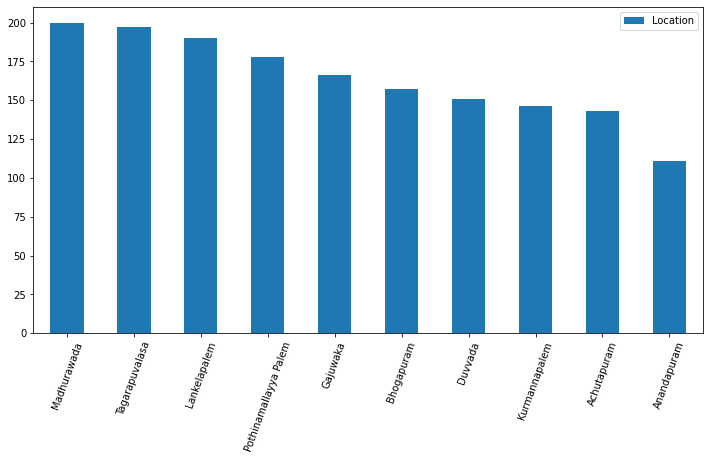

In [75]:
r_loc['Location'].value_counts().to_frame().plot(kind='bar')
plt.xticks(rotation=70)

In [61]:
pd.pivot_table(data=r_loc,index=['Location','BHK'],values=['Rate/sq_ft'])

Rate/sq_ft
Location              BHK                          
Achutapuram           2                 2491.138614
                      3                 2940.833333
                      Residential Plot   938.750000
Anandapuram           2                 1468.000000
                      3                 3062.000000
                      5                 4338.000000
                      Residential Plot  2057.009346
Bhogapuram            2                 4000.000000
                      Residential Plot  1389.993590
Duvvada               2                 4888.246377
                      3                 4546.442857
                      Residential Plot  2627.416667
Gajuwaka              2                 3928.178218
                      3                 4284.711538
                      4                 5585.000000
                      6                 5000.000000
                      7                 7336.000000
                      Residential Plot  1268.800000
Kurmannapalem         2                 3574.197183
                      3                 3543.500000
                      8                 7333.000000
                      Residential Plot  1015.000000
Lankelapalem          2                 3641.534884
                      3                 3864.824561
                      Residential Plot  5868.500000
Madhurawada           1                 2600.000000
                      2                 4222.793814
                      3                 4553.112676
                      4                 9345.000000
                      Residential Plot  1817.620690
Pothinamallayya Palem 2                 4626.099010
                      3                 4782.641791
                      Residential Plot   925.800000
Tagarapuvalasa        2                 4806.750000
                      3                 3793.000000
                      Residential Plot  1820.453125

In [62]:
r_loc.groupby(['Location','BHK'])['Rate/sq_ft'].mean().to_frame().sort_values('Rate/sq_ft',ascending = False)[:20]

Rate/sq_ft
Location              BHK                          
Madhurawada           4                 9345.000000
Gajuwaka              7                 7336.000000
Kurmannapalem         8                 7333.000000
Lankelapalem          Residential Plot  5868.500000
Gajuwaka              4                 5585.000000
                      6                 5000.000000
Duvvada               2                 4888.246377
Tagarapuvalasa        2                 4806.750000
Pothinamallayya Palem 3                 4782.641791
                      2                 4626.099010
Madhurawada           3                 4553.112676
Duvvada               3                 4546.442857
Anandapuram           5                 4338.000000
Gajuwaka              3                 4284.711538
Madhurawada           2                 4222.793814
Bhogapuram            2                 4000.000000
Gajuwaka              2                 3928.178218
Lankelapalem          3                 3864.824561
Tagarapuvalasa        3                 3793.000000
Lankelapalem          2                 3641.534884

In [63]:
r_loc.sort_values('Rate/sq_ft')

,proprty_type,seller,Location,Area in sqft,Rate/sq_ft,status,possession,Approved by RERA,BHK,project name,Price(in lakhs)
1023,Residential,Bhoomatha Group,Tagarapuvalasa,1800,266.0,New,not mentioned,No,Residential Plot,Bhoomatha Thalluri,4.80
2814,Residential,Soniya Estate,Madhurawada,1565,434.0,New,not mentioned,No,Residential Plot,Opulence Shri,6.80
2954,Residential,AA GROUPS,Madhurawada,435600,500.0,Resale,not mentioned,No,Residential Plot,NH 16,2178.00
1522,Residential,ushasait,Bhogapuram,1800,500.0,New,not mentioned,No,Residential Plot,VISHAL ESTATESBhogapuram,9.00
1088,Residential,Vimala V,Achutapuram,1800,611.0,New,Dec 18994,No,Residential Plot,venture narayanadri,11.00
...,...,...,...,...,...,...,...,...,...,...,...
2822,Residential,Siri Venkateswara Developers,Duvvada,1980,16666.0,New,not mentioned,No,Residential Plot,Siri Venkateswara,330.00
2861,Residential,Fortune Properties,Bhogapuram,267,19000.0,New,not mentioned,No,Residential Plot,CMR GOLDFIELDBhogapuram,50.73
73,Residential,Harish,Tagarapuvalasa,166,23000.0,New,not mentioned,No,Residential Plot,Residential PlotTagarapuvalasa,38.18
2521,Residential,Siri Venkateswara Developers Pvt Ltd,Anandapuram,266,23499.0,New,not mentioned,No,Residential Plot,nandanavanam 2Anandapuram,62.50


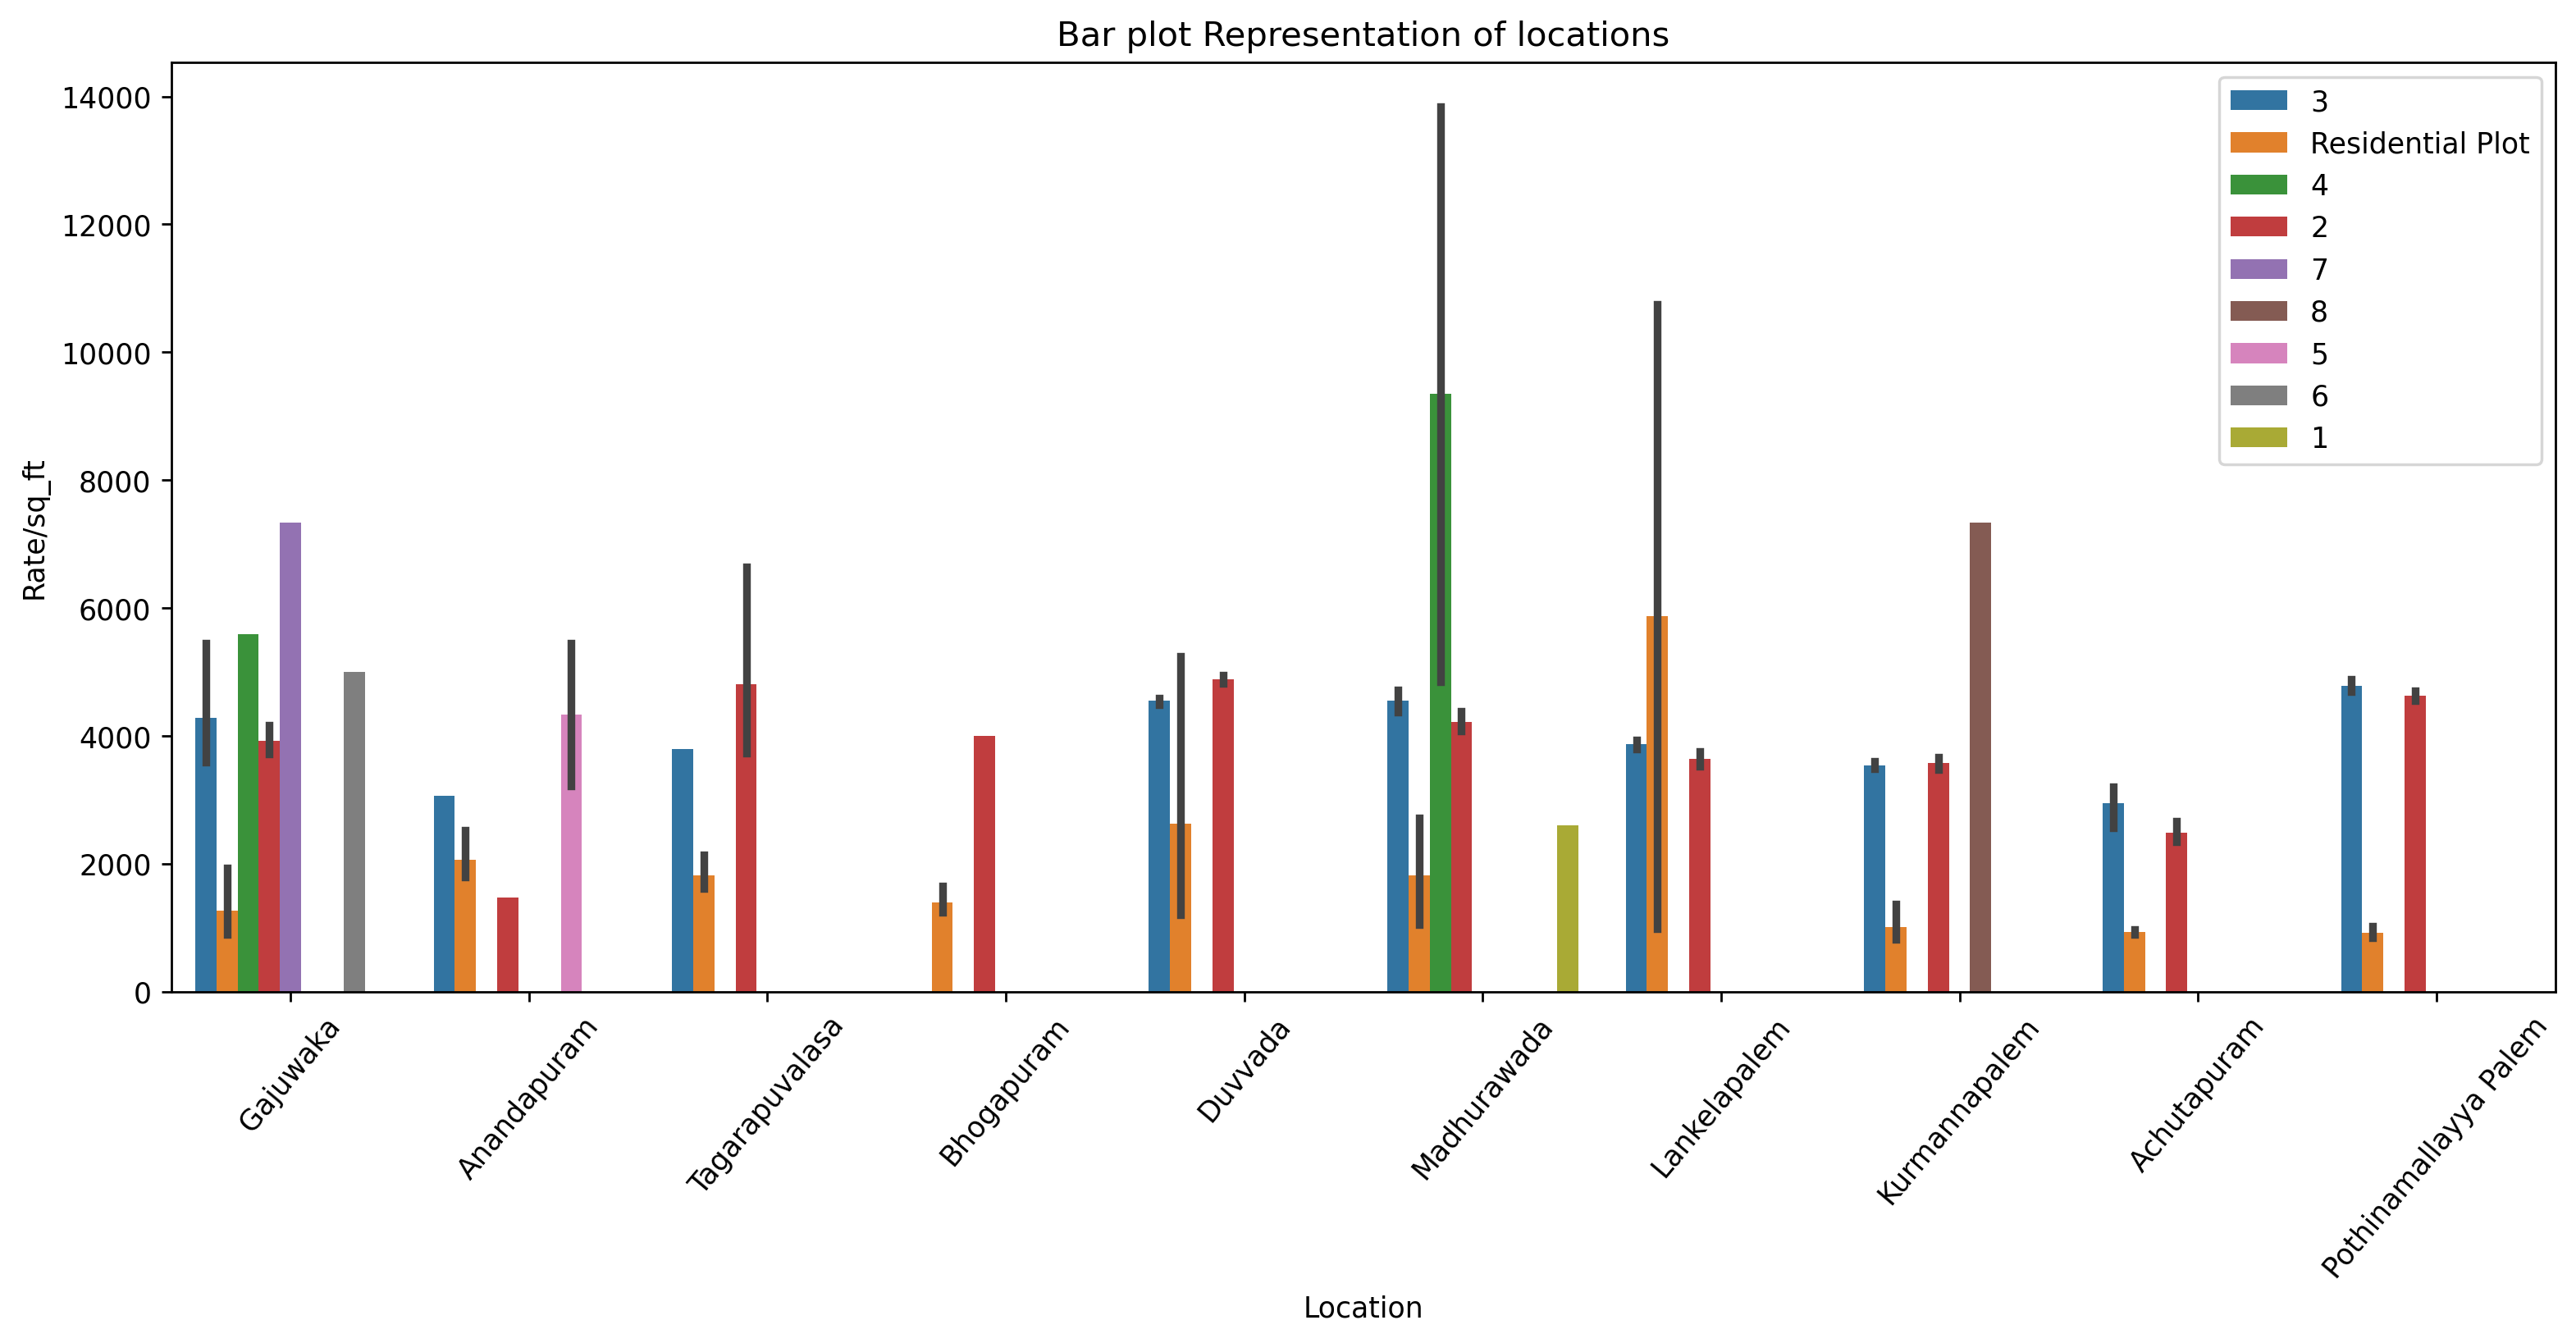

In [64]:
plt.figure(figsize=(15,6), dpi=250)
sns.barplot(x='Location', y='Rate/sq_ft',hue='BHK' ,data=r_loc.sort_values('Rate/sq_ft',ascending=False))
plt.xticks(rotation=50)
plt.title('Bar plot Representation of locations')
plt.legend(loc='upper right')

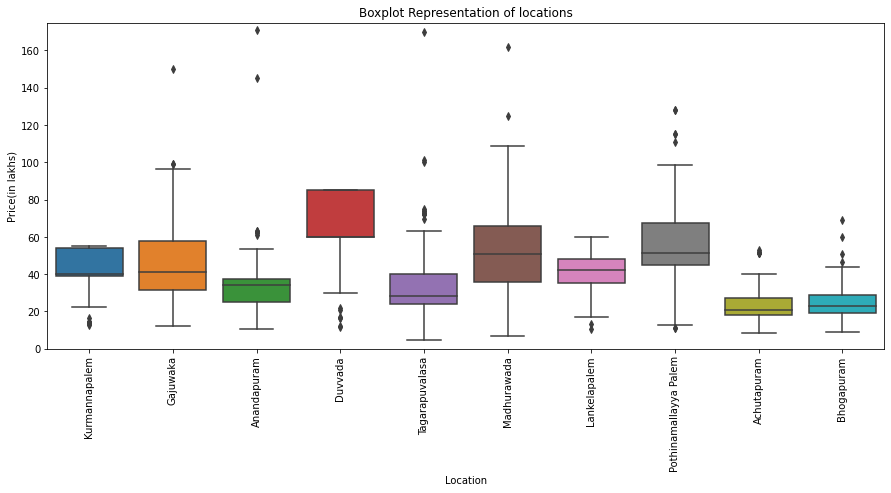

In [65]:
plt.figure(figsize=(15,6))
sns.boxplot(data=r_loc,x='Location',y='Price(in lakhs)')
plt.title('Boxplot Representation of locations')
plt.ylim(0,175)
plt.xticks(rotation=90)
plt.show()

observation:
-  by observing above boxplots we can define that 
-  Higher prices are in MADHURAWADA  and lowest prices are in KOTHAVALASA location.
-  Average prices of Madhurawada,Duvvada and Endada are in the same region.


In [66]:
pd.pivot_table(data=r_loc,index=['Location','proprty_type'],values=['Price(in lakhs)'])

Price(in lakhs)
Location              proprty_type                 
Achutapuram           Apartment           25.852991
                      Residential         16.460278
Anandapuram           Apartment           21.000000
                      Residential         34.192804
                      Villa              164.666667
Bhogapuram            Residential         24.688910
                      Villa               40.000000
Duvvada               Apartment           50.833333
                      Independent         60.043478
                      Residential         48.019167
                      Villa               84.328358
Gajuwaka              Apartment           47.744145
                      Independent        112.000000
                      Residential         18.945000
Kurmannapalem         Apartment           44.569926
                      Independent        220.000000
                      Residential         17.047500
                      Villa               30.915000
Lankelapalem          Apartment           23.930435
                      Independent         47.117647
                      Residential         18.332500
                      Villa               36.786885
Madhurawada           Apartment           57.655146
                      Residential        115.193448
Pothinamallayya Palem Apartment           59.626905
                      Residential         16.246000
Tagarapuvalasa        Apartment           41.272500
                      Independent         74.000000
                      Residential         33.095833

### Relation plot:

(0.0, 10000.0)

<Figure size 720x576 with 0 Axes>

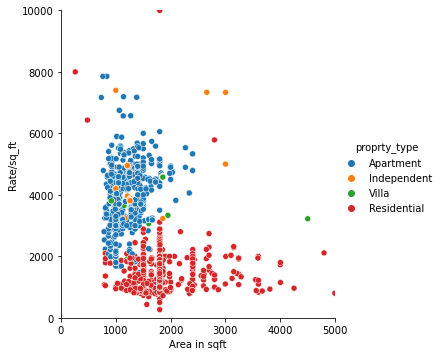

In [67]:
plt.figure(figsize=(10,8))
sns.relplot(x="Area in sqft",y="Rate/sq_ft",color='k',hue='proprty_type',data=r_loc)
plt.xlim(0,5000)
plt.ylim(0,10000)

## heatmap:

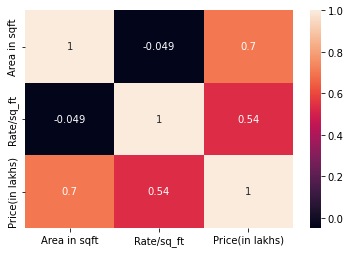

In [68]:
sns.heatmap(real_estate_df.corr(), annot=True)
plt.show()

In [69]:
real_estate_df.corr()

,Area in sqft,Rate/sq_ft,Price(in lakhs)
Area in sqft,1.000000,-0.048641,0.703808
Rate/sq_ft,-0.048641,1.000000,0.536371
Price(in lakhs),0.703808,0.536371,1.000000


### comparing rate by seller

In [70]:
r_loc['seller'].value_counts().to_frame()

,seller
property advisor,291
Shiva,81
Royal,66
Sainadh,63
Royals,54
...,...
My Homez Telangana Realty,1
n ramachandra rao,1
rehman,1
Anji Girijala,1


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'property advisor'),
  Text(1, 0, 'Shiva'),
  Text(2, 0, 'Royal'),
  Text(3, 0, 'Sainadh'),
  Text(4, 0, 'Royals'),
  Text(5, 0, 'Venkat'),
  Text(6, 0, 'devudu babu'),
  Text(7, 0, 'Aditi Estaste'),
  Text(8, 0, 'Shivaan'),
  Text(9, 0, 'kiran'),
  Text(10, 0, 'Swati realtor'),
  Text(11, 0, 'smart homes'),
  Text(12, 0, 'parvathi'),
  Text(13, 0, 'Fortune Properties'),
  Text(14, 0, 'Madhurayana'),
  Text(15, 0, 'madhu'),
  Text(16, 0, 'Soniya Estate'),
  Text(17, 0, 'Moksha'),
  Text(18, 0, 'Rajesh'),
  Text(19, 0, 'seller')])

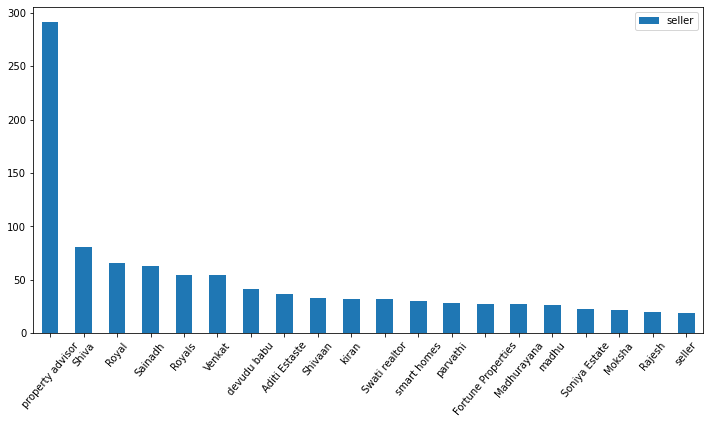

In [76]:
r_loc['seller'].value_counts()[0:20].to_frame().plot(kind='bar')
plt.xticks(rotation=50)

<Figure size 1440x720 with 0 Axes>

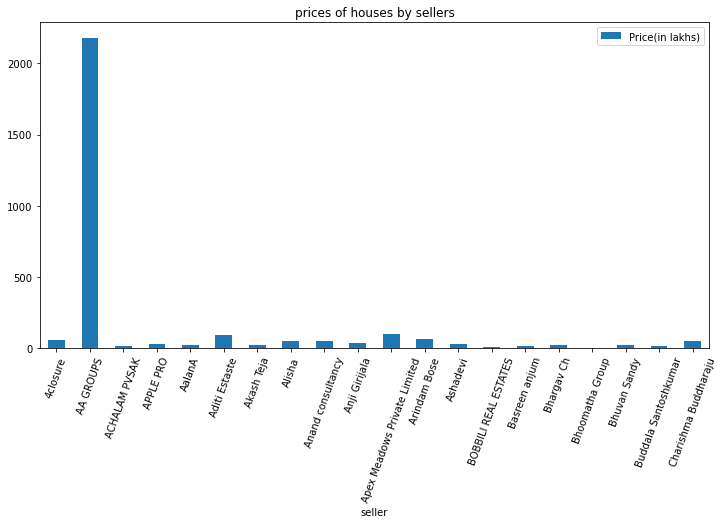

In [72]:
plt.figure(figsize=(20,10))
plt.rcParams['figure.figsize'] = [12,6]
r_loc.groupby('seller')['Price(in lakhs)'].max().to_frame()[0:20].plot(kind='bar')
plt.title('prices of houses by sellers')
plt.xticks(rotation=70)
plt.show()

In [73]:
r_loc.groupby('seller')['proprty_type'].unique().to_frame()

,proprty_type
seller,
4closure,"[Residential, Apartment]"
AA GROUPS,"[Residential, Apartment]"
ACHALAM PVSAK,[Apartment]
APPLE PRO,[Apartment]
AalanA,[Apartment]
...,...
vsprealtors,[Residential]
vv constructions,[Apartment]
yallayya,[Apartment]


### Bubble plot:

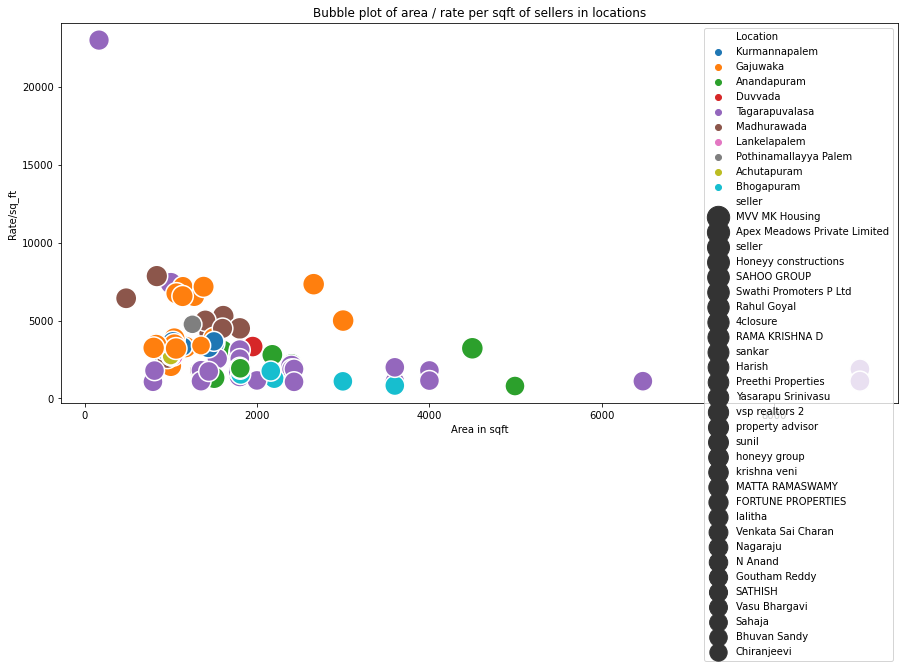

In [74]:
plt.figure(figsize=(15,7))
sns.scatterplot(x='Area in sqft', y='Rate/sq_ft',size='seller', hue='Location',sizes=(300,500),alpha=1.0,
                data=r_loc[0:100])
plt.title('Bubble plot of area / rate per sqft of sellers in locations')
plt.legend(loc='upper right')